In [1]:
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# *Labour Cost Regression Models - AUSTRALIA*

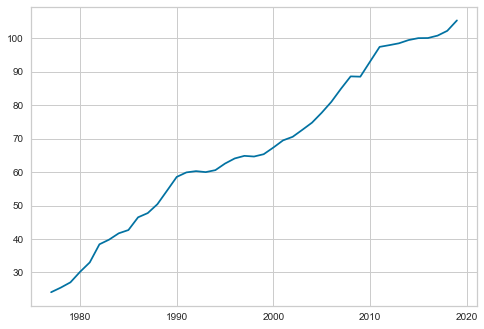

In [3]:
df=pd.read_csv("../Datasets/labour_cost.csv")
df=df[['LOCATION', 'TIME', 'Value','Measure']]
t1=df[df['Measure']=='Index']
df=t1[t1['LOCATION']=='AUS']
plt.plot(df['TIME'],df['Value'])

# Linear Regression Model

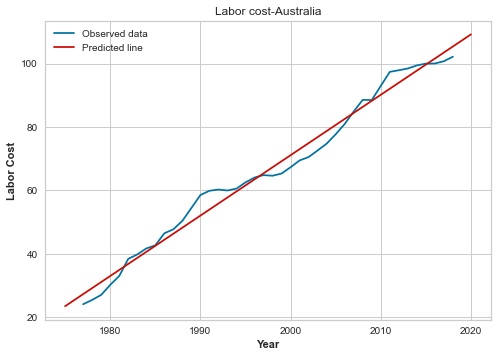

In [3]:
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x_shape=np.array(df['TIME'][:-1]).reshape(-1, 1)
y_shape=np.array(df['Value'][:-1]).reshape(-1, 1)
model=LinearRegression()
model.fit(x_shape,y_shape)
x_test=np.linspace(1975,2020)
y_pred=model.predict(x_test[:,None])
plt.plot(x_shape,y_shape,'b')
plt.plot(x_test,y_pred,'r')
plt.title('Labor cost-Australia')
plt.legend(['Observed data','Predicted line'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Labor Cost', fontweight ='bold')
plt.show()

In [4]:
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.7)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]
y_train=y_train.reshape(len(y_train),1)
x_train=x_train.reshape(len(x_train),1)
x_test=x_test.reshape(len(x_test),1)
y_test=y_test.reshape(len(y_test),1)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_poly_pred=model.predict(x_test.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

rmse 3.797124608720174
r2 0.5759020532208714


In [5]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [6]:
model.predict(np.asarray([2020]).reshape(1, -1))

array([[106.39097505]])

**predicted value for the year-2020**

In [7]:
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################

# *Labour Cost Regression Models - Czech Republic*

In [4]:
df=pd.read_csv("../Datasets/labour_cost.csv")
t1=df[df['Measure']=='Index']
df=t1[t1['LOCATION']=='CZE']

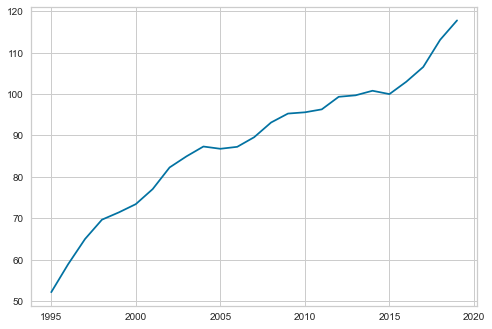

In [5]:
plt.plot(df['TIME'],df['Value'])

# Linear  Regression Model

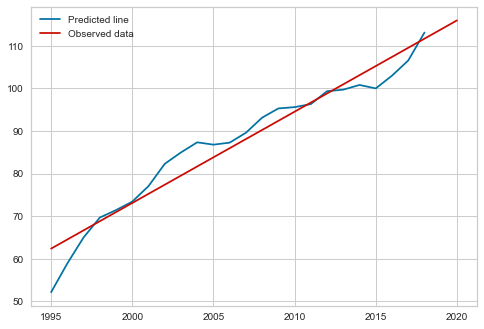

rmse 7.920517844405943
r2 -0.4815091480944065


In [10]:
df=df[['TIME','Value']]
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x_shape=np.array(df['TIME'][:-1]).reshape(-1, 1)
y_shape=np.array(df['Value'][:-1]).reshape(-1, 1)
model=LinearRegression()
model.fit(x_shape,y_shape)
x_test=np.linspace(1995,2020)
y_pred=model.predict(x_test[:,None])
plt.plot(x_shape,y_shape,'b')
plt.plot(x_test,y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.7)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_poly_pred=model.predict(x_test.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

# Polynomial Regression Model (degree-2)


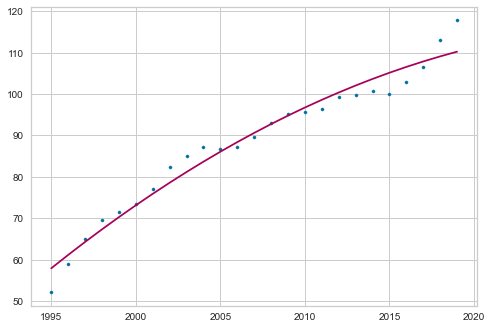

In [11]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


# Polynomial Regression Model (degree-3)


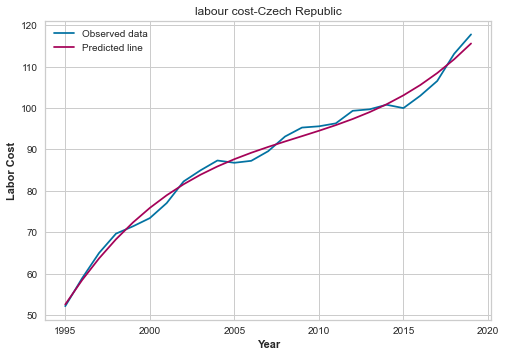

rmse 4.098435290446573
r2 0.6033263531045151


In [12]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.plot(x, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('labour cost-Czech Republic')
plt.legend(['Observed data','Predicted line'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Labor Cost', fontweight ='bold')
plt.show()
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(x_test)
y_poly_pred = model.predict(x_test_poly)
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

In [13]:
model.predict(polynomial_features.fit_transform(np.asarray([2020]).reshape(1, -1)))

array([[125.84437819]])

**predicted value for the year-2020**

In [14]:
################################################################################################################################
################################################################################################################################
################################################################################################################################
################################################################################################################################

# *Labour Cost Regression Models - Lithuania*

In [6]:
df=pd.read_csv("../Datasets/labour_cost.csv")

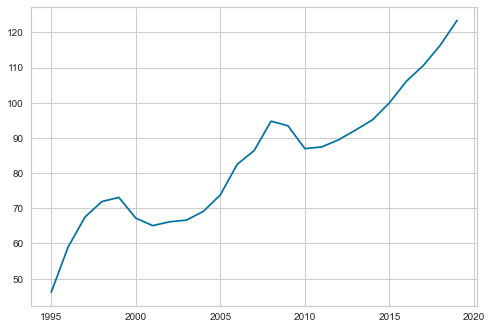

In [7]:
t1=df[df['Measure']=='Index']
df=t1[t1['LOCATION']=='LTU']
plt.plot(df['TIME'],df['Value'])

In [17]:
from keras import models, layers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

In [18]:

dataset={'x':x.reshape(1,len(x))[0],'y':y.reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)
normalized = scaler.fit_transform(df_data)
# inverse transform
inverse = scaler.inverse_transform(normalized)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)
scaler = StandardScaler()
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
    x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
    y_scaled.append(scaled[i][1])

# Support Vector Regression(SVR)

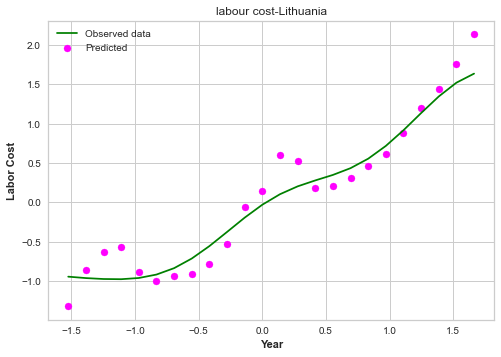

rmse 0.2819305350031524
r2 0.34393802743080915


In [19]:
regressor = SVR(kernel='rbf')
regressor.fit(x_scaled,y_scaled)
x_scaled=x_scaled[1:]
y_scaled=y_scaled[1:]
y_pred = regressor.predict(x_scaled)
plt.scatter(x_scaled, y_scaled, color = 'magenta')
plt.plot(x_scaled, regressor.predict(x_scaled), color = 'green')
plt.title('labour cost-Lithuania')
plt.legend(['Observed data','Predicted'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Labor Cost', fontweight ='bold')
plt.show()
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_test),y_test))
r2 = r2_score(y_test,regressor.predict(x_test))
print("rmse",rmse)
print("r2",r2)

In [20]:
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))

In [21]:
y_pred

array([114.88052927])

**predicted value for the year-2020**